## Variation in Nitrogen Wet Deposition with Precipitation Intensity and Frequency in New Hampshire

@author = Paola Miramontes
@date = 2025-10-20
@license = MIT -- https://opensource.org/licenses/MIT

## Introduction
Nitrogen (N) deposition is essential to nutrient cycling and transport between atmospheric, terrestrial, and aquatic ecosystems.
Studying N wet deposition is particularly important because it directly influences water quality, soil processes, and ecosystem 
productivity. The amount and type of N deposited can be influenced by multiple factors, including seasonal patterns, emission 
sources, and atmospheric transport (Murray & Wymore, 2024; Nanus et al., 2018; Wetherbee & Mast, 2016).

With ongoing changes in climate, shifts in precipitation frequency and intensity could alter N deposition patterns, potentially affecting nutrient loading and ecosystem dynamics. Understanding these relationships and identifying the key drivers of nitrogen wet deposition across temporal and spatial scales will help refine management strategies aimed at mitigating the harmful effects of excess or limited N deposition to terrestrial and aquatic ecosystems.

## Research question and hypothesis
### Research question: 
How does nitrogen wet deposition vary with changes in precipitation intensity and frequency in New Hampshire?

### Hypothesis: 
Nitrogen wet deposition increases with higher precipitation intensity and frequency because intense storms scavenge more atmospheric N.

## Study site description
`![NH_WetDepCollectors](TF_HB_Map.jpg)`


## Data set description
National Atmospheric Deposition Program (NADP) weekly wet deposition from 1978-2025
Thompson Farm weekly wet deposition from 2003-2025 (this is raw data we've collected and will need a lot of data cleaning)

## Initial raw data
This code imports, cleans, and combines weekly precipitation data for the Lamprey River (TF) and Hubbard Brook (HB) and plots a time series showing precipitation volume (mL) over time for both sites.

-I need to go back and clean this code-

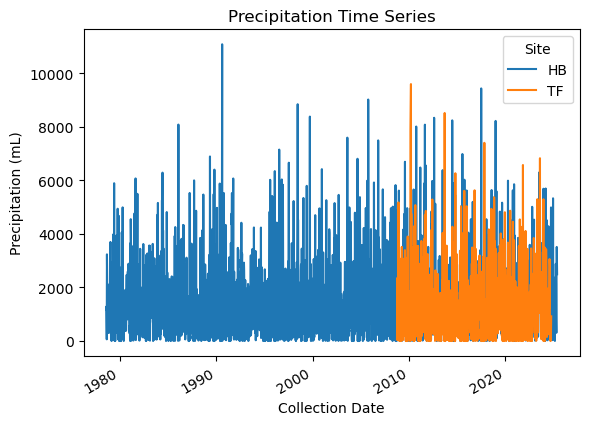

In [1]:
#%% Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

#%% Parameters
Lamp_file='20241022 Lamprey Precipitation Query w formatting_M.S.csv'
HB_file='NTN-nh02-w-s-mg.csv'

#Set wd
pathData = '/Users/paolamiramontes/Library/CloudStorage/OneDrive-USNH/2. School/NR 985 Hydro Data Anal/Project'
os.chdir(pathData)

#%%Load wet dep chemistry data
lamp_df = pd.read_csv(Lamp_file)
HB_df = pd.read_csv(HB_file)

#%%Preprocess Lamprey data
#Keep only wet dep for Lamprey (TF2)
lamp_df = lamp_df[lamp_df['Sample Name'] == 'TF2']

lamp_df=lamp_df.rename(columns={'Volume': 'prcp_mL','Sample Name': 'site'})

lamp_sub=lamp_df[['Collection Date', 'Collection Time', 'prcp_mL', 'site']].copy()

lamp_sub['CollectionDateTime'] = pd.to_datetime(lamp_sub['Collection Date'] + ' ' + lamp_sub['Collection Time'], 
    format='%d-%b-%y %H:%M:%S %p')

# Keep consistent column order
lamp_sub = lamp_sub[['CollectionDateTime', 'prcp_mL', 'site']]

#%%Preprocess Hubbard Brook data
HB_df=HB_df.rename(columns={'dateOn': 'StartDate', 
                            'dateOff': 'EndDate',
                            'svol': 'prcp_mL',
                            'siteID': 'site'})

HB_sub=HB_df[['StartDate', 'EndDate', 'prcp_mL','site']].copy()

#Convert 'EndDate' column to datetime
HB_sub['CollectionDateTime'] = pd.to_datetime(HB_sub['EndDate'], format='%Y-%m-%d %H:%M')
    
# Replace -9 with NaN
HB_sub = HB_sub.replace(-9, np.nan)
HB_sub = HB_sub[['CollectionDateTime', 'prcp_mL', 'site']]

#%% Combine both datasets
combined = pd.concat([lamp_sub, HB_sub], ignore_index=True)

#Sort chronologically
combined = combined.sort_values('CollectionDateTime')

#Replace site names with descriptive names (HB:Hubbard Brook and TF: Thompson Farm)
combined['site'] = combined['site'].replace({'NH02': 'HB', 'TF2': 'TF'})

# Drop NaT and NaN before plotting
combined_clean = combined.dropna(subset=['CollectionDateTime', 'prcp_mL'])
# Set datetime index
combined_clean = combined_clean.set_index('CollectionDateTime')

#%% Time series plot
# Create figure and axis
fig, ax = plt.subplots()

# Plot each site as a separate line
for site in combined_clean['site'].unique():
    site_data = combined_clean[combined_clean['site'] == site]
    ax.plot(site_data.index, site_data['prcp_mL'], label=site, linestyle='-')

ax.set_xlabel('Collection Date')
ax.set_ylabel('Precipitation (mL)')
ax.set_title('Precipitation Time Series')
ax.legend(title='Site')
fig.autofmt_xdate()
plt.show()

## Additional code for data cleaning and figures

## Long-Term Trends in Precipitation
Compare long-term precipitation trends at both sites 

Determine whether total precipitation volume per year has changed over time

Precipitation frequency: number of days per year with measurable precipitation

High-intensity precipitation frequency: number of events above a certain threshold (e.g., >25 mm/day, or 95th percentile of all events)

-Linear regression of precipitation frequency over time (e.g. Figure 5 in Howarth et al., 2019)
or
-Bar graphs of precipitation frequency for multiple high precipitation events (e.g. Figure 6 in Howarth et. al., 2019)

In [ ]:
# Sum precipitation (mm) per year per site
# Plot of annual totals

## Trends in precipitation intensity and frequency
Determine if number of high-precipitation events changed over time

In [ ]:
# Define “high” events (e.g., >90th percentile precipitation).
# Count number of high events per year and test for temporal trends.

## Bar graph or line graph of nitrogen deposition over time
Might end up being multiple figures since there are different species of nitrogen (e.g. TDN, NH4, NO3). I will also be calculating fluxes and ploting them along with the raw concentrations

In [ ]:
# Calculate nitrogen flux
# Convert mL of precipitation to L/m^2, then multiply by concentration (mg/L)
# Plot time series of nitrogen fluxes

## Determine relationship between precipitation and nitrogen deposition
Test whether high-precipitation events drive higher nitrogen deposition

In [ ]:
# Calculate correlation between weekly precipitation and nitrogen flux
# Plot scatterplots with regression lines for both sites